Image shape: (600, 800)
SVD shapes - U: (600, 600), Sigma: (600,), Vt: (600, 800)
X^T X shape: (800, 800)
XX^T shape: (600, 600)


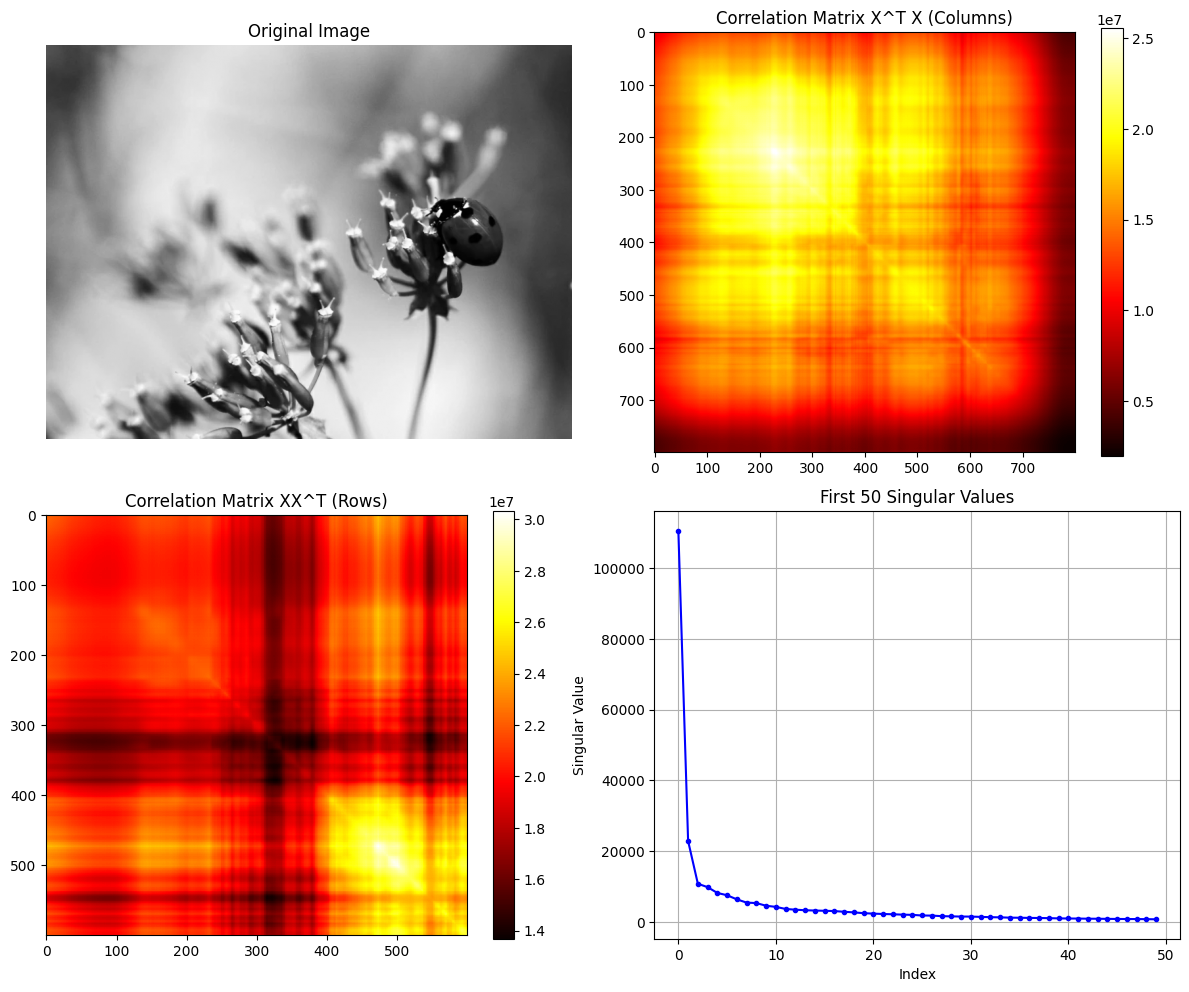


First 10 singular values: [110624.09986859  22848.90260012  10763.67910861   9794.57555862
   8158.6524114    7508.72297885   6340.59810791   5429.03497301
   5292.47983851   4537.47738427]
Condition number: 6.13e+04


In [1]:
import numpy as np
from PIL import Image
import cv2

import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('4.webp', cv2.IMREAD_GRAYSCALE)
if img is None:
    # If cv2 fails, try PIL
    img = Image.open('4.webp').convert('L')
    img = np.array(img)

# Convert to float for better numerical precision
X = img.astype(np.float64)
print(f"Image shape: {X.shape}")

# Perform SVD decomposition
U, sigma, Vt = np.linalg.svd(X, full_matrices=False)
print(f"SVD shapes - U: {U.shape}, Sigma: {sigma.shape}, Vt: {Vt.shape}")

# Compute correlation matrices
# X^T X - correlation matrix of columns (m x m)
XtX = X.T @ X
print(f"X^T X shape: {XtX.shape}")

# XX^T - correlation matrix of rows (n x n) 
XXt = X @ X.T
print(f"XX^T shape: {XXt.shape}")

# Visualize correlation matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original image
axes[0, 0].imshow(X, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# X^T X correlation matrix (columns)
im1 = axes[0, 1].imshow(XtX, cmap='hot', interpolation='nearest')
axes[0, 1].set_title('Correlation Matrix X^T X (Columns)')
plt.colorbar(im1, ax=axes[0, 1])

# XX^T correlation matrix (rows)
im2 = axes[1, 0].imshow(XXt, cmap='hot', interpolation='nearest')
axes[1, 0].set_title('Correlation Matrix XX^T (Rows)')
plt.colorbar(im2, ax=axes[1, 0])

# Eigenvalues visualization
axes[1, 1].plot(sigma[:50], 'bo-', markersize=3)
axes[1, 1].set_title('First 50 Singular Values')
axes[1, 1].set_xlabel('Index')
axes[1, 1].set_ylabel('Singular Value')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

# Additional analysis - eigenvalues and eigenvectors
print(f"\nFirst 10 singular values: {sigma[:10]}")
print(f"Condition number: {sigma[0]/sigma[-1]:.2e}")